In [130]:
import os
print( os.getcwd())
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np



e:\DATA\SIGMA\CUSTOMER_SEGMENTING_TASK


In [38]:
df = pd.read_csv('Customer_Segmentation_Dataset.csv')

In [39]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [41]:
df.shape
# there are 2240 rows and 29  columns

(2240, 29)

In [40]:
# checking the data types of the columns
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [42]:
# checking for misisng values 
df.isnull().sum()
# only income  has missing values 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [43]:
# to fill income  column we will use the mean of the column 
df['Income'].fillna(df['Income'].mean() , inplace=True) 
df['Income'].isnull().sum()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12764\2597079619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean() , inplace=True)


np.int64(0)

In [44]:
#  now we will drop the columns which are  irrelevant for predicting the customer segments 
columns_to_drop = [
    'ID',                
    'Z_CostContact','Z_Revenue','AcceptedCmp1',      
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain'
]

df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.shape
# now we're left with 2240 rows and 19 columns


(2240, 19)

FEATURE ENGINEERING 
EXTRACTING DATA FROM THE GIVEN FAEATURES , SUCH AS AGE , NO. OF CHILDERN ETC . 


In [46]:
df['Age'] = 2025-df['Year_Birth']

In [47]:
# drop the Year_Birth column
df.drop(columns=['Year_Birth'], inplace=True)

In [48]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']


In [49]:
# dropping the kidhome and teenhome columns
df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

In [50]:
df.columns
# form the data attributes pdf we know that 
'''Products
• MntWines: Amount spent on wine in last 2 years
• MntFruits: Amount spent on fruits in last 2 years
• MntMeatProducts: Amount spent on meat in last 2 years
• MntFishProducts: Amount spent on fish in last 2 years
• MntSweetProducts: Amount spent on sweets in last 2 years
• MntGoldProds: Amount spent on gold in last 2 years
'''
# soo we will create a new column called totalspend  which is the sum of all the columns that start with Mnt 

'Products\n• MntWines: Amount spent on wine in last 2 years\n• MntFruits: Amount spent on fruits in last 2 years\n• MntMeatProducts: Amount spent on meat in last 2 years\n• MntFishProducts: Amount spent on fish in last 2 years\n• MntSweetProducts: Amount spent on sweets in last 2 years\n• MntGoldProds: Amount spent on gold in last 2 years\n'

In [51]:
mnt_columns = [col  for  col  in df.columns  if col.startswith( 'Mnt')]
df['Total_Spend' ] = df[ mnt_columns].sum(axis = 1 )  

In [52]:
# customer loyalty 
# we will create a new column called customer_loyalty which is the the number of  days since the customer has been a customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

df['Loyalty'] = (pd.Timestamp('2025-01-01') - df['Dt_Customer']).dt.days




In [56]:
df.drop(columns=['Dt_Customer'], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  Age                  2240 non-null   i

In [58]:
# education and marital status are categorical variables 
# we will convert them to numerical variables using one hot encoding 

print(df['Education'].unique())
print(df['Marital_Status'].unique())


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [59]:
# matital status has some uselss values like yolo , absurd , alone which  don't make sense
# we will replace them with 'single' 
df['Marital_Status'].replace({'Absurd': 'Single', 'YOLO': 'Single', 'Alone': 'Single'}, inplace=True)


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12764\3632880630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital_Status'].replace({'Absurd': 'Single', 'YOLO': 'Single', 'Alone': 'Single'}, inplace=True)


In [60]:
print(df['Marital_Status'].unique())


['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [61]:
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Basic'
})


In [62]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


In [63]:
df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Total_Children,Total_Spend,Loyalty,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,1617,4502,True,False,False,False,True,False,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,27,3952,True,False,False,False,True,False,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,776,4151,True,False,False,False,False,True,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,1,53,3978,True,False,False,False,False,True,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,1,422,4000,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,1,1341,4220,True,False,False,True,False,False,False
2236,64014.0,56,406,0,30,0,0,8,7,8,...,3,444,3858,False,False,True,False,False,True,False
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,1241,3994,True,False,False,False,False,False,False
2238,69245.0,8,428,30,214,80,30,61,2,6,...,1,843,3995,False,True,False,False,False,True,False


In [65]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Children',
       'Total_Spend', 'Loyalty', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [ ]:
# FEATURE SCALING  . using standard scaler . 
# feature scaling is important in 'clustering algorithms' because they are sensitive to the scale of the data
# we will use standard scaler to scale the data

scaler = StandardScaler()
features_to_scale = ['Income', 'Age', 'Loyalty', 'Total_Children', 'Total_Spend']
df_scaled = scaler.fit_transform(df[features_to_scale]) # we will store it as a seperate dataframe 




In [ ]:
# converting the numpy array back to a pd dataframe 
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)


In [73]:
df_scaled

,Income,Age,Loyalty,Total_Children,Total_Spend
0,0.235327,0.985345,1.531185,-1.264505,1.679417
1,-0.235826,1.235733,-1.190545,1.396361,-0.961275
2,0.773633,0.317643,-0.205773,-1.264505,0.282673
3,-1.022732,-1.268149,-1.061881,0.065928,-0.918094
4,0.241519,-1.017761,-0.953012,0.065928,-0.305254
...,...,...,...,...,...
2235,0.358568,0.150717,0.135680,0.065928,1.221032
2236,0.470064,1.903435,-1.655713,2.726794,-0.268717
2237,0.189106,-1.017761,-0.982703,-1.264505,1.054951
2238,0.679035,1.068807,-0.977755,0.065928,0.393948


## EXPLORATORY DATA ANALYSIS 

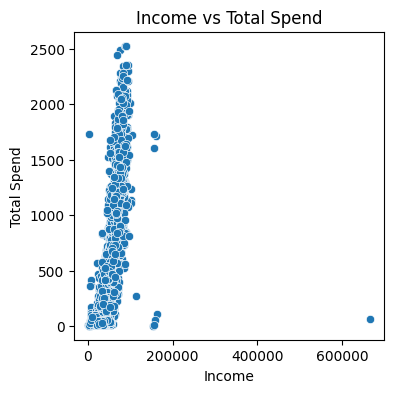

In [94]:
# it is usually obserrves that higher income people are more likely to spend more money on products 
# lets check the correlation between the features 'income' and 'total_spend' 
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='Income', y='Total_Spend')
plt.title('Income vs Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
#plt.grid(True)
plt.show()
# interpretation : Customers with similar incomes don’t necessarily spend the same amount.
# So, Income alone doesn’t determine spending — other factors (like age, loyalty, family size) might influence it.




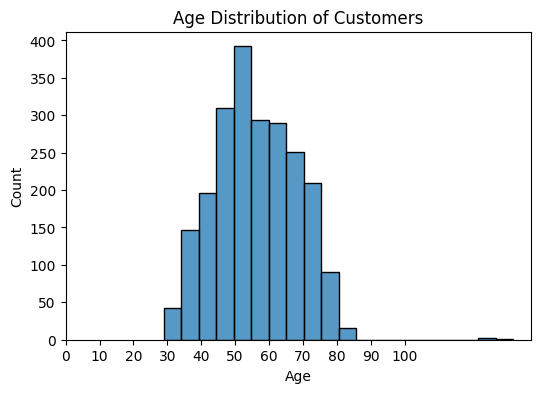

In [ ]:
# age distribution 
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, )
plt.title('Age Distribution of Customers')
plt.xticks(range(0, 101, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# interpretation : The age distribution is  almost normal with a slight right skew. 
# the people of ages 45-60 are the most common customers. 


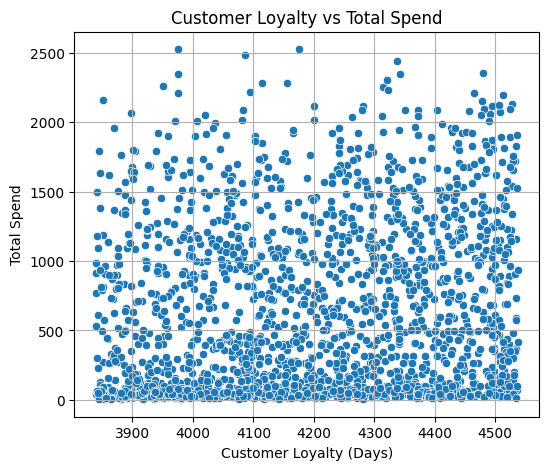

In [81]:
# customer loyalty vs total spend 

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Loyalty', y='Total_Spend')
plt.title('Customer Loyalty vs Total Spend')
plt.xlabel('Customer Loyalty (Days)')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()
# interpretation : Customers are  evenly distributed across the loyalty spectrum, but those who are more loyal tend to spend more.

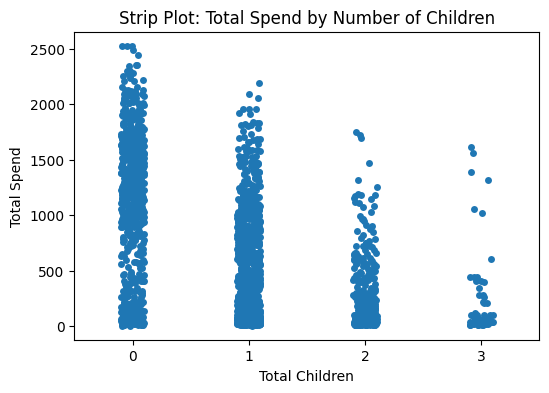

In [90]:
# spending based on family sixe i.e total children 
# using strip plot 
plt.figure(figsize=(6, 4))
sns.stripplot(data=df, x='Total_Children', y='Total_Spend', jitter=True)
plt.title('Strip Plot: Total Spend by Number of Children')
plt.xlabel('Total Children')
plt.ylabel('Total Spend')
plt.show()
# interpretation : Customers with no children tend to spend more, while those with more children tend to spend less.



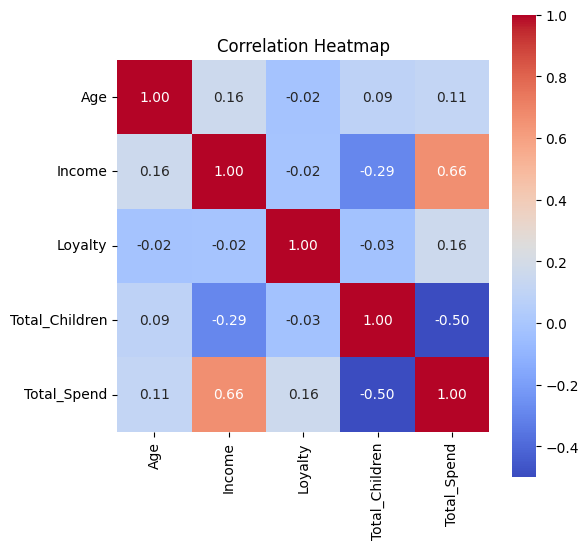

In [97]:
# heatmap of the correlation matrix 
correlation_features = [
    'Age',
    'Income',
    'Loyalty',
    'Total_Children',
    'Total_Spend',
   ]
correlation_matrix = df[correlation_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# K MEANS  CLUSTERING 

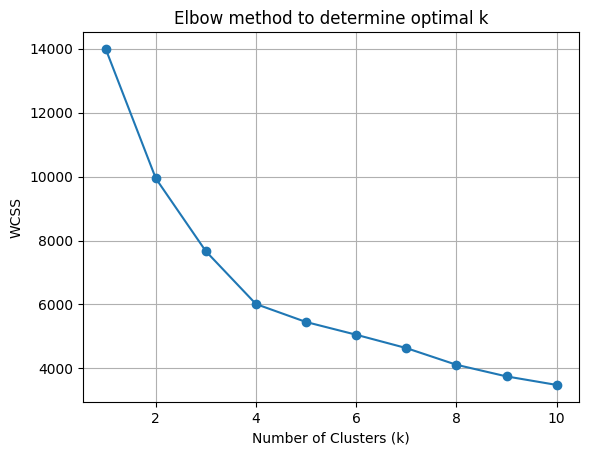

In [115]:

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal k')
plt.grid(True)
plt.show()



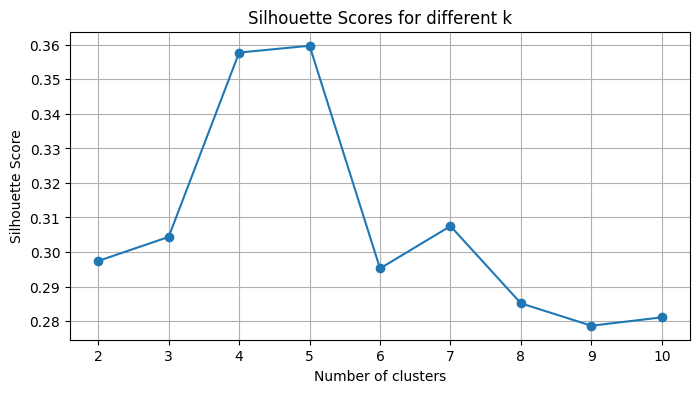

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8,4))
plt.plot(range(2,11), sil_scores, marker='o')
plt.title('Silhouette Scores for different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# shiloutte score is highest for k=5 or 4  so  we willl choose one of them 

In [ ]:
 
km_final = KMeans(n_clusters=  5, random_state=42, n_init=10)
labels = km_final.fit_predict(df_scaled)

df['Cluster'] = labels


print(df['Cluster'].value_counts())


#here using n_clusters = 5 gives us an outlier hence we wil use n_clusters = 4 


Cluster
0    732
3    549
2    530
1    428
4      1
Name: count, dtype: int64


In [119]:
km_final = KMeans(n_clusters=  4, random_state=42, n_init=10)
labels = km_final.fit_predict(df_scaled)

df['Cluster'] = labels


print(df['Cluster'].value_counts())

Cluster
0    732
3    549
2    530
1    429
Name: count, dtype: int64


In [132]:
cluster_table = df.groupby('Cluster')[['Age', 'Income', 'Total_Spend', 'Total_Children' , 'Education_Graduation', 
                                       'NumWebPurchases' , 'NumDealsPurchases' ]].mean().round(1)
cluster_table

,Age,Income,Total_Spend,Total_Children,Education_Graduation,NumWebPurchases,NumDealsPurchases
Cluster,,,,,,,
0,48.0,32266.5,74.0,1.0,0.0,2.0,2.0
1,49.0,74293.0,1363.0,0.0,1.0,5.0,1.0
2,69.0,65405.0,978.0,1.0,0.0,6.0,2.0
3,60.0,45207.0,116.0,2.0,0.0,3.0,3.0


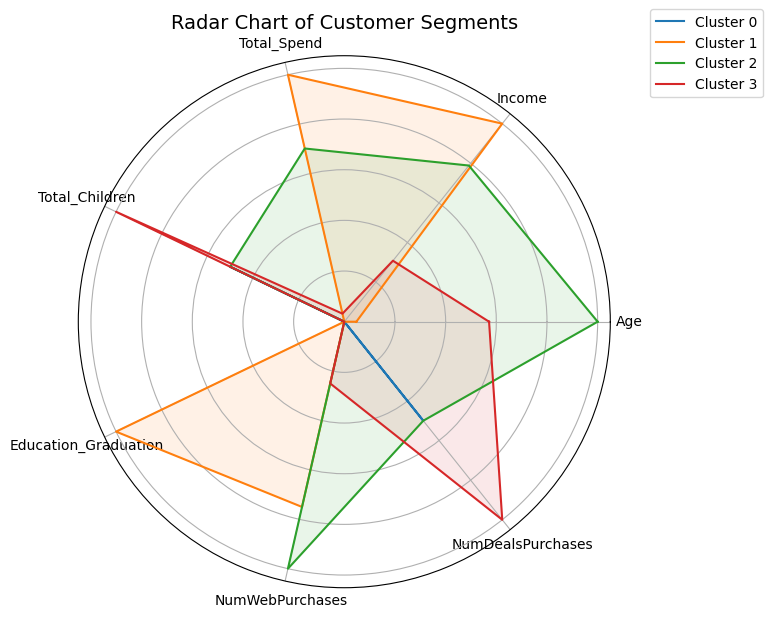

In [131]:


cluster_data = {
    'Cluster': [0, 1, 2, 3],
    'Age': [48.0, 49.0, 69.0, 60.0],
    'Income': [32266.5, 74293.0, 65405.0, 45207.0],
    'Total_Spend': [74.0, 1363.0, 978.0, 116.0],
    'Total_Children': [1.0, 0.0, 1.0, 2.0],
    'Education_Graduation': [0.0, 1.0, 0.0, 0.0],
    'NumWebPurchases': [2.0, 5.0, 6.0, 3.0],
    'NumDealsPurchases': [2.0, 1.0, 2.0, 3.0]
}

df = pd.DataFrame(cluster_data).set_index('Cluster')
df_normalized = (df - df.min()) / (df.max() - df.min())

labels = df.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # repeat the first angle to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


for i, row in df_normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Radar Chart of Customer Segments", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


# INDEPTH ANALYSIS OF THE 4 CLUSTERS 


# Cluster 0: Low-Income, Low-Spend Families ( Low-Income Minimal Spenders)
Age: Middle-aged (48)

Income: Low (32K)

Spending: Extremely low (only 74 total)

Children: 1

Education: Not graduates

Purchasing behavior: Minimal, both online and in deals


# Cluster 1: High-Income, High-Spending Digital Professionals  - ( High-Value Digital Shoppers )
Age: 49 (middle-aged)

Income: Highest (74K+)

Spending: Highest (1363)

Children: None

Education: Graduated

Behavior: High online purchases, low deal usage

# Cluster 2: Older Online Shoppers ( Affluent Senior Shoppers )
Age: 69 (oldest group)

Income: High (65K)

Spending: High (978)

Children: 1

Education: Not graduates

Behavior: Very active online

# Cluster 3: Traditional, Deal-Driven Families  (Deal-Focused Family Segment )
Age: 60

Income: Modest (45K)

Spending: Very low (116)

Children: 2 (highest)

Education: Not graduates

Behavior: Medium online, high deal usage 











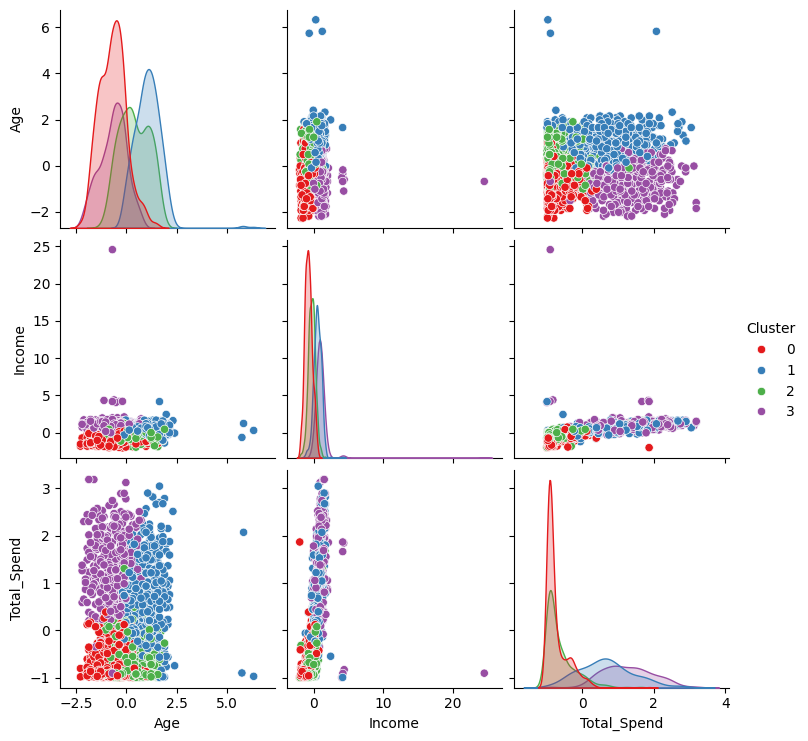

In [113]:
sns.pairplot(df_scaled, hue='Cluster', vars=['Age','Income', 'Total_Spend'], palette='Set1')
plt.show()